---
title: "Understanding Internal Thought Patterns Through Self-Reflection"
subtitle: "A study of overthinking, emotional regulation, and self-talk"
author:
  - name: "Nicole Friedl"
    affiliation: "University of Wisconsin - Madison"
date: 2025-07-03
abstract: >
  This study explores how individuals reflect on internal thought patterns such as overthinking, emotional regulation, and self-talk. Using a Likert-scale survey composed of 17 introspective statements, we analyze the latent structure of these self-reported experiences. Participants were asked to rate their agreement with statements that reflect everyday mental habits. After data cleaning and transformation, we applied exploratory data analysis and principal component analysis (PCA) to uncover potential underlying dimensions. Results suggest the presence of a dominant pattern of rumination across several items. Implications for self-awareness and psychological measurement are discussed.
keywords:
  - introspection
  - survey research
  - python
  - quarto
  - overthinking
execute:
  echo: true
  warning: false
format:
  html:
    toc: true
    toc-depth: 3
    toc-title: "Table of Contents"
    number-sections: true
    code-fold: true
    code-tools: true
    keep-md: true
    embed-resources: true
  pdf:
    toc: true
    number-sections: true
    documentclass: "article"
jupyter: python3
bibliography: references.bib
csl: apa.csl
---

# Introduction

Many people experience ongoing internal dialogue, emotional overanalysis, and persistent self-reflection in their daily lives. These patterns like rehearsing conversations, doubting one’s own thoughts, or overanalyzing social interactions can be both mentally exhausting and difficult to describe. Despite being common, these experiences are often discussed informally or in therapeutic settings but are rarely measured systematically. As a result, there is limited empirical research that attempts to capture the structure of these internal thought processes using quantitative methods.

Patterns of internal thought such as overanalyzing conversations, doubting decisions, or mentally rehearsing interactions are a part of everyday life. These cognitive and emotional habits, while normal, are rarely explored systematically through structured surveys. In psychology, concepts like self-perception theory (Bem, 1967, 1972) and emotional self-awareness (Laird, 2007) suggest that individuals infer their emotional states by observing their behavior and inner dialogue.

This study seeks to explore how individuals reflect on and report their own internal experiences, including overthinking, emotional regulation, and patterns of self-talk. The survey consists of 17 statements presented on a 5-point Likert scale, where participants rate how strongly they agree or disagree with each. The items are written in a relatable and conversational tone, designed to capture everyday cognitive and emotional habits such as zoning out in conversations, mentally scripting responses, and recognizing self-critical thoughts. These items were intentionally designed to reflect a range of internal tendencies, from rumination and anxiety to mindfulness and self-compassion.

The goal of this study is to examine whether underlying dimensions exist within these self-reported experiences and, if so, how they group together. This approach may help clarify how people conceptualize their inner lives and reveal consistent patterns across individuals.

The central research question guiding this analysis is:
What are the underlying dimensions of internal thought and emotional processing, as reflected in participants’ responses to a series of self-reflective Likert-scale items?

# Survey Design

The survey includes 17 Likert-scale statements related to overthinking, emotional regulation, and self-awareness. Participants responded on a 1–5 scale ranging from “Strongly Disagree” to “Strongly Agree.” The items were intentionally phrased in a relatable, conversational tone to increase self-reflection and engagement. The survey was designed to capture common emotional experiences such as rumination, emotional regulation, and self-talk.

# Methods

## Participants and Procedure 

This study was conducted using an online survey created in Qualtrics and distributed via Prolific, a crowdsourcing platform commonly used for academic research. Participants were compensated for their time in accordance with Prolific's ethical payment guidelines. The survey was anonymous and took approximately 5–7 minutes to complete. A total of 115 individuals completed the survey, and responses were recorded directly in Qualtrics.

## Data Loading and Cleaning

Participants were recruited to complete the survey anonymously. Initial data inspection revealed two metadata rows, which were removed. Items Q1 through Q17 were retained, and all other columns were dropped. Responses with more than 3 missing items were excluded (n = 10), and remaining missing data rows were removed (total retained: 105).

Justification: Dropping participants with excessive missingness (more than 3 unanswered items) to preserve data quality while retaining a reasonable sample size.



In [11]:
#| echo: false
#| results: 'hide'

import pandas as pd
import numpy as np

#Loading the dataset
df_raw = pd.read_csv("dialogue.csv")

# Dropping first two metadata rows and reset index
df = df_raw.iloc[2:].reset_index(drop=True)

#Keeping only relevant Likert items (Q1–Q17)
likert_items = [f"Q{i}" for i in range(1, 18)]
df_likert = df[likert_items].copy()

#Seeing missing values per participant
df_likert['missing_count'] = df_likert.isnull().sum(axis=1)

#Dropping participants with more than 3 missing responses
df_cleaned = df_likert[df_likert['missing_count'] <= 3].drop(columns='missing_count')

#Dropping rows with any remaining missing values
df_cleaned = df_cleaned.dropna()

#Recoding responses to numerical values
scale_map = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}
df_numeric = df_cleaned.replace(scale_map).astype(int)

df_numeric.shape

/var/folders/8k/p47n5sgs6yn245v6xqw8lwnh0000gn/T/ipykernel_52544/519394156.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric = df_cleaned.replace(scale_map).astype(int)


(105, 17)

# Data dictionary

Each item represents a different introspective statement related to thought patterns. These are detailed in a data dictionary table, which connects question codes (Q1–Q17) to their full text.

In [12]:
#| echo: false
data_dict = pd.DataFrame({
    "Item": likert_items,
    "Description": [
        "I zone out in conversations and then panic when I’m asked a question.",
        "I plan things in my head and never actually do them.",
        "I feel guilty when I relax, even if I’ve earned it.",
        "I sometimes think, 'Why am I like this?' and have no answer.",
        "I rehearse arguments in my head that may never happen.",
        "I doubt myself even when I know I’m capable.",
        "I catch myself narrating my own life like it’s a movie.",
        "I mentally script texts before I send them.",
        "I have imaginary conversations to prepare for real ones.",
        "I try to pause and name what I’m feeling, even if I don’t always get it right.",
        "I recognize when I’m being too hard on myself.",
        "I remind myself that thoughts aren’t facts.",
        "I know when I'm overthinking, and I keep doing it anyway.",
        "I sometimes overanalyze people’s tone or word choice after we talk.",
        "I talk to myself with kindness like how I would talk to a friend.",
        "I frequently talk to myself in my head.",
        "I replay past conversations or mistakes in my mind."
    ]
})
data_dict


,Item,Description
0,Q1,I zone out in conversations and then panic whe...
1,Q2,I plan things in my head and never actually do...
2,Q3,"I feel guilty when I relax, even if I’ve earne..."
3,Q4,"I sometimes think, 'Why am I like this?' and h..."
4,Q5,I rehearse arguments in my head that may never...
5,Q6,I doubt myself even when I know I’m capable.
6,Q7,I catch myself narrating my own life like it’s...
7,Q8,I mentally script texts before I send them.
8,Q9,I have imaginary conversations to prepare for ...
9,Q10,"I try to pause and name what I’m feeling, even..."


# Results
Summary statistics were calculated for each item, including mean, standard deviation, and response range.

In [13]:
summary_stats = df_numeric.describe().T
summary_stats[['mean', 'std', 'min', 'max']]

,mean,std,min,max
Q1,2.552381,1.224595,1.0,5.0
Q2,4.361905,0.810078,1.0,5.0
Q3,2.685714,1.436571,1.0,5.0
Q4,3.066667,1.442931,1.0,5.0
Q5,3.276190,1.490323,1.0,5.0
Q6,2.866667,1.401007,1.0,5.0
Q7,2.847619,1.419513,1.0,5.0
Q8,3.580952,1.269320,1.0,5.0
Q9,3.542857,1.315796,1.0,5.0
Q10,2.961905,1.292908,1.0,5.0


Items Q2 ("I plan things in my head and never actually do them") and Q17 ("I replay past conversations or mistakes in my mind") had the highest means (4.36 and 4.05), indicating frequent agreement. In contrast, Q1 and Q3 reflected lower average agreement.

# Figure 1

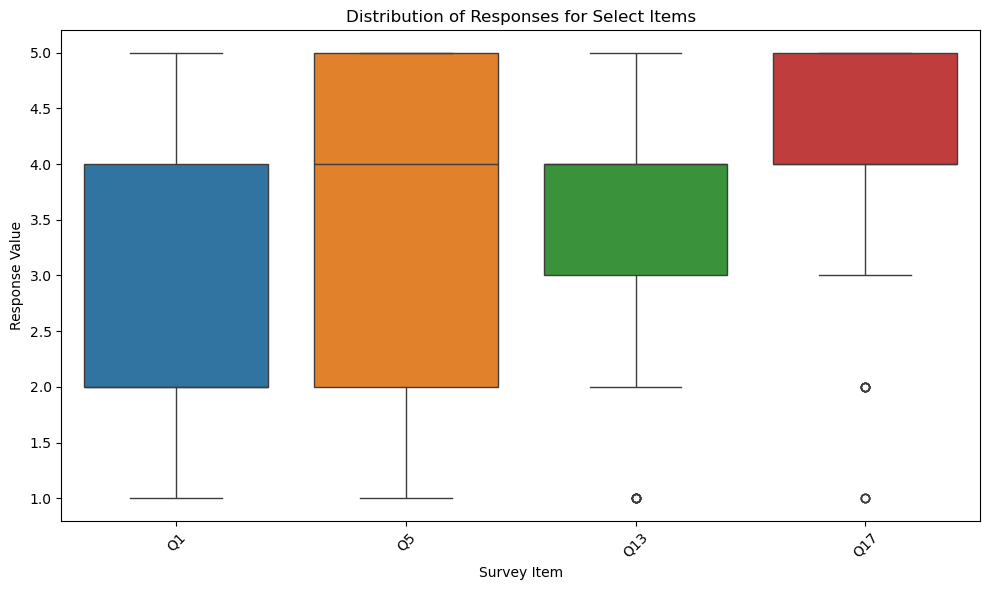

In [14]:
#| echo: false
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric[['Q1', 'Q5', 'Q13', 'Q17']])
plt.title("Distribution of Responses for Select Items")
plt.ylabel("Response Value")
plt.xlabel("Survey Item")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These items illustrate diverse distributions across themes such as anxiety (Q1), overthinking (Q5, Q13), and memory recall (Q17). The broad spread in values supports the idea of individual variability in internal thought patterns.

# Visual 2 

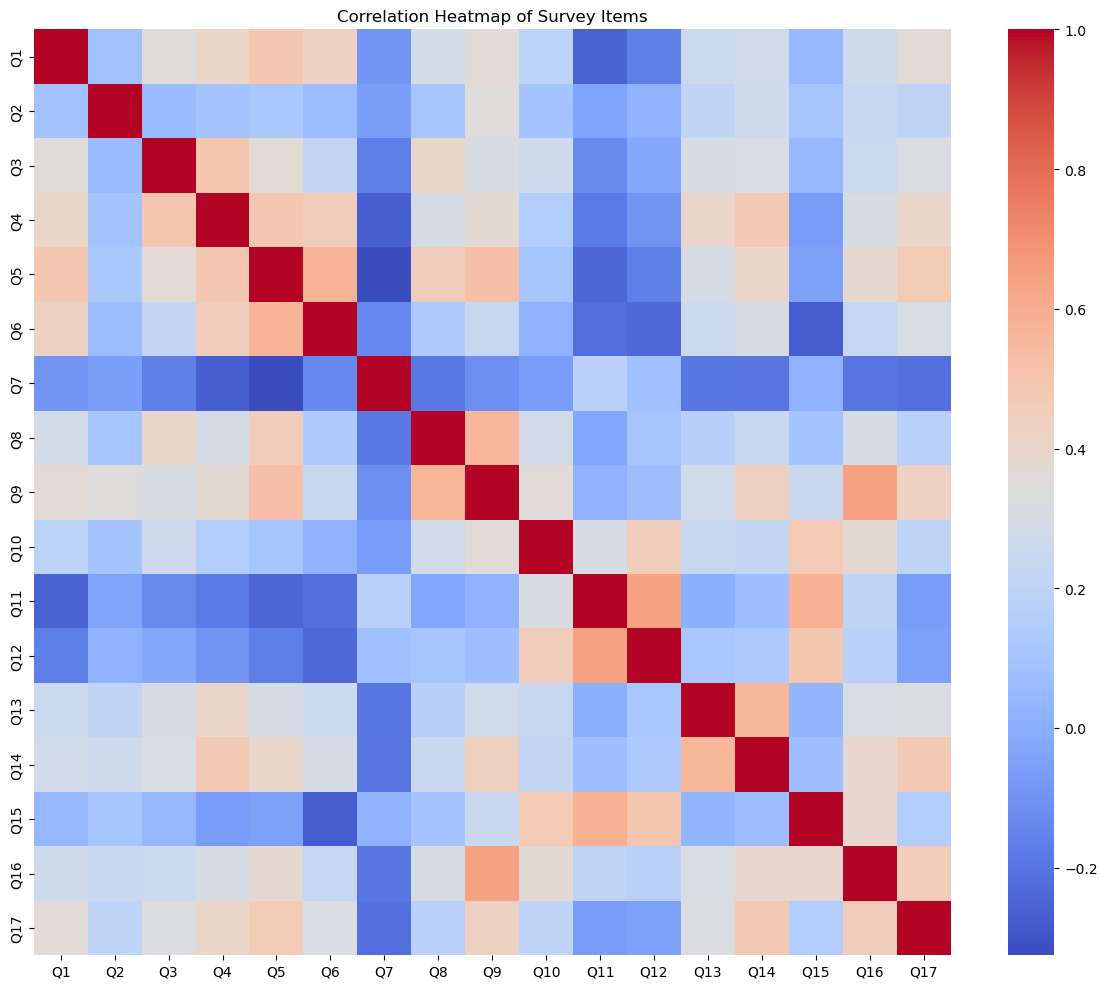

In [15]:
#| echo: false
corr = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Survey Items")
plt.tight_layout()
plt.show()

Most items show moderate positive correlation, suggesting overlapping constructs. Stronger clusters emerge around Q3–Q9 and Q13–Q17, indicating shared cognitive tendencies like rumination.

# Visual 3

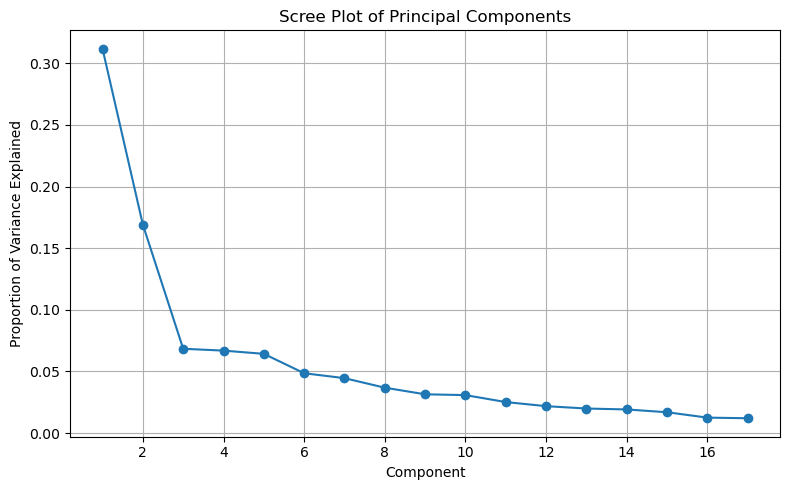

In [16]:
#| echo: false
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(df_numeric)
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Scree Plot of Principal Components")
plt.xlabel("Component")
plt.ylabel("Proportion of Variance Explained")
plt.grid(True)
plt.tight_layout()
plt.show()

The scree plot indicates one dominant component, suggesting a strong underlying factor in how participants responded.

# Table: Top Loadings on First Principal Component

In [17]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(df_numeric.columns))], index=df_numeric.columns)
loadings[['PC1']].sort_values(by='PC1', ascending=False).head(10)

,PC1
Q5,0.399793
Q4,0.360453
Q9,0.320677
Q3,0.303948
Q6,0.276414
Q14,0.271894
Q16,0.259613
Q1,0.254674
Q8,0.246494
Q13,0.224966


Items with the highest loadings include Q5 (rehearsing arguments), Q4 (existential doubt), and Q9 (imaginary conversations), all of which reflect overthinking or mental simulation. This supports the hypothesis that rumination may be a key dimension underlying internal thought processes.

# Discussion

Our analysis reveals that certain introspective statements, especially those reflecting rumination and anticipatory anxiety, are highly endorsed and strongly correlated. The PCA findings confirm a central latent factor, likely related to persistent cognitive rehearsal or worry. Bem’s 1967 article laid the foundation for self-perception theory [@bem1967self], which he later expanded in his 1972 book [@bem1972self] This study aligns with self-perception theory [@bem1967self] and emotional self-awareness models [@laird2007feelings].

Implications: Understanding these thought patterns can inform how people perceive themselves and their emotional responses. Clinically, these insights may support assessments in anxiety, mindfulness, or behavioral therapy.

Limitations: The dataset lacks demographic variables, limiting subgroup analysis. All responses are self-reported and cross-sectional.

Next Steps: Future research should test this factor structure in a larger, more diverse sample and assess reliability over time.

# References

```{bibliography}

